# Mid-term Exam Computations

## Expected Value
$E(x) = \sum xP(x)$

In [1]:
distribution = {
    10: .1,
    11: .25,
    12: .3,
    13: .25,
    14: .1
}

In [2]:
distribution.keys()

dict_keys([10, 11, 12, 13, 14])

In [23]:
E = 0
for value in distribution.keys():
    prob = distribution[value]
    E += (value * prob)
    print("{0:3d} x {1:5.3f} = {2:5.3f} E: {3:-6.3f}".format(value, prob, (value * prob), E))

 10 x 0.100 = 1.000 E:  1.000
 11 x 0.250 = 2.750 E:  3.750
 12 x 0.300 = 3.600 E:  7.350
 13 x 0.250 = 3.250 E: 10.600
 14 x 0.100 = 1.400 E: 12.000


In [8]:
E

12.0

## Combinations

n things taken r at a time

$$C = \frac{n!}{(n-r)!r!}$$

In [39]:
import math

def combinations(n, r):
    return int(math.factorial(n)/(math.factorial(n-r)*math.factorial(r)))

## Probability

What is the probability of rolling exactly two sixes in 6 rolls of a die?

There are five things you need to do to work a binomial story problem.

1. Define Success first. Success must be for a single trial. Success = "Rolling a 6 on a single die"
2. Define the probability of success (p): p = 1/6
3. Find the probability of failure: q = 5/6
4. Define the number of trials: n = 6
5. Define the number of successes out of those trials: x = 2

The probability of getting exactly x success in n trials, with the probability of success on a single trial being p is:

$$P(X=x) = nCx \times p^{x} \times q^{(n-x)}$$

In a large metropolitan area, past records revealed that 30% of all the high school graduates go to college. From 20 graduates selected at random, what is the probability that exactly 8 will go to college?

In [27]:
# Define the probability of success (p): 
p = 0.30

In [28]:
# Find the probability of failure: 
q = 1 - p

In [29]:
# Define the number of trials: 
n = 20

In [30]:
# Define the number of successes out of those trials: 
x = 8

In [43]:
import numpy as np

def compute(p, q, n, x):
    return combinations(n,x)*np.power(p,x)*np.power(q,(n-x))

In [44]:
compute(p, q, n, x)

0.114396739704861

## z-score

In [1]:
def z(y, mu, sigma):
    return (y - mu)/sigma

In [2]:
z(320, 500, 75)

-2.4

## Significance Test for a Mean
$$se = \frac{s}{\sqrt{n}}$$

$$t = \frac{\bar{y} - \mu_{0}}{se}$$

In [5]:
import numpy as np

def se(s, n):
    return s/np.sqrt(n)

def tscore(ybar, mu0, se):
    return (ybar - mu0)/se

In [6]:
n = 35
ybar = 21.5
s = 5.6
mu0 = 18

In [15]:
round(se(s, n),3)

0.947

In [16]:
t = tscore(ybar, mu0, round(se(s, n),3))

In [17]:
t

3.695881731784583

In [18]:
round(t, 3)

3.696

## Confidence Interval for a Proportion

$$se = \sqrt{\frac{\hat{\pi}(1 - \hat{\pi})}{n}}$$

In [25]:
import numpy as np

def se(n, hatpi):
    return np.sqrt((hatpi*(1-hatpi))/n)

def ci(hatpi, se, z):
    pm = z*se
    print("π ± z(se) = {0} ± {1}({2:2.3f}) = {3} ± {4:2.4f}, or ({5:2.4f},{6:2.4f})".format(hatpi,z,se, hatpi,pm, hatpi-pm,hatpi+pm))


In [21]:
n = 500
hatpi = 350/500

In [22]:
se(n, hatpi)

0.020493901531919198

In [23]:
round(se(n, hatpi), 3)

0.02

In [24]:
350/500

0.7

In [26]:
ci(hatpi, 0.02, 1.96)

π ± z(se) = 0.7 ± 1.96(0.020) = 0.7 ± 0.0392, or (0.6608,0.7392)


## University Data

In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('university_data.csv')

In [29]:
df.head()

,instnm,stateabbr,intuitfees,sector
0,Alaska Pacific University,AK,19610,private
1,University of Alaska Anchorage,AK,6262,public
2,University of Alaska Fairbanks,AK,6466,public
3,University of Alaska Southeast,AK,6669,public
4,Alabama A & M University,AL,9096,public


In [30]:
import numpy as np

In [31]:
np.mean(df.intuitfees)

21403.283120376596

In [34]:
np.std(df.intuitfees, ddof=1)

12937.607657429624

In [36]:
from scipy import stats

In [40]:
stats.sem(df.intuitfees, ddof=1)

335.5046103648158

In [41]:
len(df.intuitfees)

1487

In [42]:
12937.607657429624 / np.sqrt(1487)

335.50461036481573

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e640da0>]],
      dtype=object)

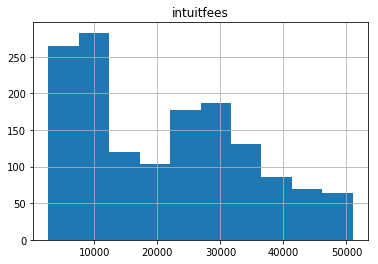

In [47]:
df.hist('intuitfees')

(array([265., 283., 120., 104., 177., 187., 131.,  86.,  70.,  64.]),
 array([ 2700. ,  7530.8, 12361.6, 17192.4, 22023.2, 26854. , 31684.8,
        36515.6, 41346.4, 46177.2, 51008. ]),
 <a list of 10 Patch objects>)

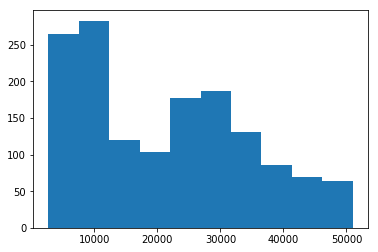

In [48]:
plt.hist(df.intuitfees)

(array([  6.,  42., 163., 137.,  80.,  47.,  26.,  18.,   7.,   5.]),
 array([ 2700. ,  4207.2,  5714.4,  7221.6,  8728.8, 10236. , 11743.2,
        13250.4, 14757.6, 16264.8, 17772. ]),
 <a list of 10 Patch objects>)

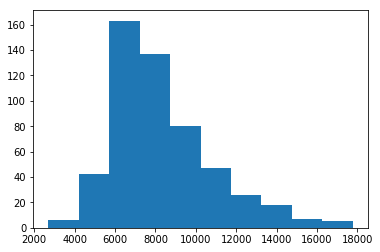

In [50]:
plt.hist(df.loc[df['sector'] == "public"]['intuitfees'])

(array([ 25.,  57.,  70., 107., 187., 175., 124.,  82.,  67.,  62.]),
 array([ 3950. ,  8655.8, 13361.6, 18067.4, 22773.2, 27479. , 32184.8,
        36890.6, 41596.4, 46302.2, 51008. ]),
 <a list of 10 Patch objects>)

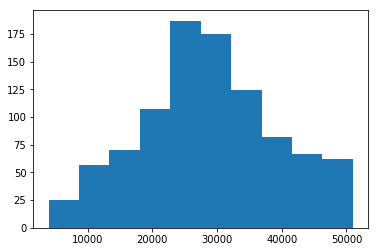

In [51]:
plt.hist(df.loc[df['sector'] == "private"]['intuitfees'])

## Binomial Distribution

This is a case where we want to apply the Probability for a Binomial Distribution, because there (1) there are two possible outcomes for each observation, (2) using the historical values, the probability is the same for each observation, (3) the outcomes for each observation are independent.

$x$ = the number of outcomes   
$n$ = the number of independent observations   
$P(x)$ = the probability that $x$ outcomes will fall into a single category   
$\pi$ = the probability that any one outcome will fall into a single category   
$1-\pi$ = the probability that any one outcome will fall into the other category   

$$P(x) = \frac{n!}{x!(n-x)!}\pi^{x}(1-\pi)^{n-x}$$

In [8]:
from math import factorial

def binomial(n, x, pi):
    term1 = factorial(n)/(factorial(x)*factorial(n-x))
    term2 = pow(pi, x)
    term3 = pow(1-pi, n-x)
    return term1*term2*term3

**9.** *In a large metropolitan area, past records revealed that 30% of all the high school graduates go to college. From 20 graduates selected at random, what is the probability that exactly 8 will go to college?*

In [10]:
n = 20
x = 8
pi = 0.3

In [11]:
binomial(n, x, pi)

0.114396739704861

In [13]:
round(binomial(n, x, pi),3)

0.114

## Significance Test for a Proportion

$z = \frac{\hat{\pi} - \pi_{0}}{se_{0}}$

$se_{0} = \sqrt{\pi_{0}(1-\pi{0})/n}$

In [14]:
import numpy as np

def se(n, pi0):
    return np.sqrt((pi0*(1-pi0))/n)

In [15]:
def zscore(hatpi, pi0, se0):
    return (hatpi-pi0)/(se0)

In [16]:
n = 600
hatpi = 320/600
pi0 = 0.5

In [17]:
se(n, pi0)

0.020412414523193152

In [18]:
round(se(n, pi0),3)

0.02

In [19]:
zscore(hatpi, pi0, se0=0.02)

1.6666666666666663

In [21]:
round(zscore(hatpi, pi0, se0=0.02), 2)

1.67

and part 2, compute the confidence interval of the proportion

In [22]:
import numpy as np

def se(n, hatpi):
    return np.sqrt((hatpi*(1-hatpi))/n)

def ci(hatpi, se, z):
    pm = z*se
    print("π ± z(se) = {0} ± {1}({2:2.3f}) = {3} ± {4:2.4f}, or ({5:2.4f},{6:2.4f})".format(hatpi,z,se, hatpi,pm, hatpi-pm,hatpi+pm))
    

In [23]:
n = 600
hatpi = 320/600
z = 1.67

In [24]:
se(n, hatpi)

0.02036700308869262

In [25]:
round(se(n, hatpi),3)

0.02

In [28]:
ci(hatpi, 0.02, 1.67)

π ± z(se) = 0.5333333333333333 ± 1.67(0.020) = 0.5333333333333333 ± 0.0334, or (0.4999,0.5667)


## Comparison of Two Groups
### Comparing Two Means

$se = \sqrt{(\frac{s_{1}^{2}}{n_{1}}) + (\frac{s_{2}^{2}}{n_{2}})}$

$t = \frac{\bar{y_{2}} - \bar{y_{1}} - 0}{se}$


In [30]:
import numpy as np

def se(n1, s1, n2, s2):
    term1 = pow(s1,2) / n1
    term2 = pow(s2,2) / n2
    return np.sqrt(term1 + term2)

In [34]:
n1 = 20
s1 = 9568
ybar1 = 68456
n2 = 25
s2 = 9378
ybar2 = 60350

In [32]:
se(n1, s1, n2, s2)

2845.2076479582297

In [33]:
round(se(n1, s1, n2, s2), 3)

2845.208

In [35]:
def tscore(ybar1, ybar2, se):
    return (ybar2 - ybar1)/se

In [36]:
tscore(ybar1, ybar2, 2845.208)

-2.849000846335312

In [37]:
round(tscore(ybar1, ybar2, 2845.208), 3)

-2.849

### confidence interval

$(\bar{y_{2}} - \bar{y_{1}}) \pm t(se)$
